# Selected a Task- "IPL_Data".


In [2]:
ipl_df = pd.read_csv('matches.csv')

In [3]:
ipl_df.shape

(756, 18)

In [1]:
# Importing necessary tools

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

##### The above data set satisfied all the requirements mentioned in the course project instructions.

#  Part-1 : Performing Data Cleaning and Preperation.

####  1) Checking for any missing values or mistakes in the data set and correcting it.
####  2) Inserting appropriate values.
####  3) Making data set ready for analysis.

In [4]:
ipl_df.sample(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,Unnamed: 17
378,379,2012,Bangalore,23-05-2012,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Chennai Super Kings,38,0,MS Dhoni,M Chinnaswamy Stadium,BF Bowden,HDPK Dharmasena,NaN
99,100,2008,Delhi,17-05-2008,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,1,Kings XI Punjab,6,0,DPMD Jayawardene,Feroz Shah Kotla,AV Jayaprakash,RE Koertzen,NaN
263,264,2011,Mumbai,27-04-2011,Pune Warriors,Chennai Super Kings,Pune Warriors,bat,normal,0,Chennai Super Kings,0,8,DE Bollinger,Dr DY Patil Sports Academy,Asad Rauf,SL Shastri,NaN
89,90,2008,Bangalore,28-05-2008,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,CRD Fernando,M Chinnaswamy Stadium,BF Bowden,AV Jayaprakash,NaN
320,321,2012,Chandigarh,12-04-2012,Pune Warriors,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,7,AD Mascarenhas,"Punjab Cricket Association Stadium, Mohali",VA Kulkarni,SK Tarapore,NaN
507,508,2014,Mumbai,23-05-2014,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,15,0,MEK Hussey,Wankhede Stadium,S Ravi,RJ Tucker,NaN
146,147,2009,Centurion,06-05-2009,Deccan Chargers,Mumbai Indians,Deccan Chargers,bat,normal,0,Deccan Chargers,19,0,RG Sharma,SuperSport Park,MR Benson,HDPK Dharmasena,NaN
618,619,2016,Visakhapatnam,13-05-2016,Mumbai Indians,Kings XI Punjab,Mumbai Indians,bat,normal,0,Kings XI Punjab,0,7,MP Stoinis,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,HDPK Dharmasena,CK Nandan,NaN
701,11142,2019,Kolkata,27-03-2019,Kolkata Knight Riders,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kolkata Knight Riders,28,0,AD Russell,Eden Gardens,Anil Chaudhary,Vineet Kulkarni,Chris Gaffaney
438,439,2013,Pune,11-05-2013,Pune Warriors,Mumbai Indians,Pune Warriors,bat,normal,0,Mumbai Indians,0,5,MG Johnson,Subrata Roy Sahara Stadium,Asad Rauf,AK Chaudhary,NaN


In [5]:
ipl_df.city.unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

In [6]:
ipl_df.rename(columns = {'Unnamed: 17' : 'umpire3'}, inplace = True)

In [7]:
# It seems like a city is missing so adding Gawahati to it would be fine.

ipl_df.loc[[461,462,466,468,469,474,476], 'city']= 'Gawahati'

In [8]:
ipl_df.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [9]:
# If we observe carefully there is a spelling correction pertaning to rising pune supergiants.
# Converting Delhi Daredevils to Delhi Capitals because they are same.
# Converting Deccan Chargers to Sun Risers Hyderabad.
# As this is truw for team1 it should be logically true for team2, winner, toss_winner

ipl_df.team1.replace({'Rising Pune Supergiant' : 'Rising Pune Supergiants', 'Delhi Daredevils' : 'Delhi Capitals', 'Deccan Chargers' : 'Sunrisers Hyderabad'}, inplace= True)
ipl_df.team2.replace({'Rising Pune Supergiant' : 'Rising Pune Supergiants', 'Delhi Daredevils' : 'Delhi Capitals', 'Deccan Chargers' : 'Sunrisers Hyderabad'}, inplace= True)
ipl_df.toss_winner.replace({'Rising Pune Supergiant' : 'Rising Pune Supergiants', 'Delhi Daredevils' : 'Delhi Capitals', 'Deccan Chargers' : 'Sunrisers Hyderabad'}, inplace= True)
ipl_df.winner.replace({'Rising Pune Supergiant' : 'Rising Pune Supergiants', 'Delhi Daredevils' : 'Delhi Capitals', 'Deccan Chargers' : 'Sunrisers Hyderabad'}, inplace= True)

In [10]:
# Lets check our work

ipl_df.winner.unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiants',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians', 'Delhi Capitals',
       'Gujarat Lions', 'Chennai Super Kings', 'Rajasthan Royals',
       'Pune Warriors', 'Kochi Tuskers Kerala', nan], dtype=object)

In [11]:
ipl_df.city.unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah',
       'Gawahati', 'Mohali', 'Bengaluru'], dtype=object)

In [12]:
# If we observe carefully there is bengaluru and bangalore so no need of two, replacing former with latter.

ipl_df.city.replace({'Bengaluru' : 'Bangalore'}, inplace = True)

In [13]:
# Lets check our work

ipl_df.city.unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah',
       'Gawahati', 'Mohali'], dtype=object)

I thought of converting dates to datetime but that is of not much use for my analysis with this data set.

#  Part-2 : Exploratory Analysis and Visualization

####  1) Asking general questions and answering them with plots.
####  2) Try using different plots.

In [14]:
# Q1 : Player with most number of man of the matches

MOM_data= ipl_df.groupby('player_of_match')[['id']].count()

MOM_data = MOM_data.sort_values('id', ascending = False).reset_index()

MOM_data.rename(columns = {'id' : 'Number_of_MOM', 'player_of_match' : 'Player'}, inplace = True)

MOM_data.head(5)

,Player,Number_of_MOM
0,CH Gayle,21
1,AB de Villiers,20
2,MS Dhoni,17
3,DA Warner,17
4,RG Sharma,17


 It seems Mr.Chris Gayle is the one with most numeber of player of the match awards.



In [15]:
# Q2 Number of matches playes each year.

total_matches_season = ipl_df.groupby('season')[['id']].count()

total_matches_season = total_matches_season.sort_values('id', ascending = False).reset_index()

total_matches_season.rename(columns = {'id' : 'Total_Games' , 'season' : 'Year'}, inplace = True)

total_matches_season


,Year,Total_Games
0,2013,76
1,2012,74
2,2011,73
3,2010,60
4,2014,60
5,2016,60
6,2018,60
7,2019,60
8,2015,59
9,2017,59


In [16]:
# Lets plot it using matplotlib
# Global Settings

matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
sns.set_style("darkgrid")

<BarContainer object of 12 artists>

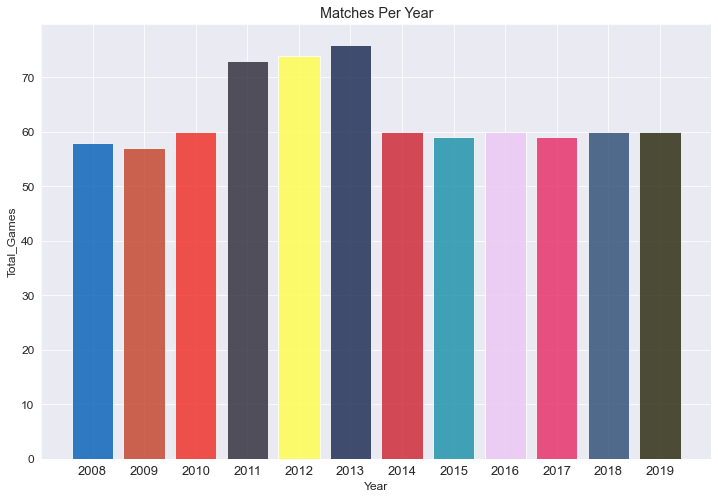

In [17]:
plt.title('Matches Per Year')
plt.xlabel('Year')
plt.ylabel('Total_Games')
plt.xticks(total_matches_season.Year, fontsize = 13)
plt.bar(total_matches_season.Year, total_matches_season.Total_Games,color=['#15244C','#FFFF48','#292734','#EF2920','#CD202D','#ECC5F2',
               '#294A73','#242307','#158EA6','#E82865',
               '#005DB7','#C23E25'], alpha = 0.8 )

The matches are almost same every year, except for 2011, 2012 and 2013 because there are more teams in those three seasons.

In [18]:
# Q3 Lets look at total number of matches won by each team!

total_wins = ipl_df.groupby('winner')[['id']].count()

total_wins = total_wins.sort_values('id', ascending = False).reset_index()

total_wins.rename(columns = {'id' : 'wins' , 'winner' : 'team'}, inplace = True)

total_wins


,team,wins
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Sunrisers Hyderabad,87
4,Royal Challengers Bangalore,84
5,Kings XI Punjab,82
6,Delhi Capitals,77
7,Rajasthan Royals,75
8,Rising Pune Supergiants,15
9,Gujarat Lions,13


<BarContainer object of 12 artists>

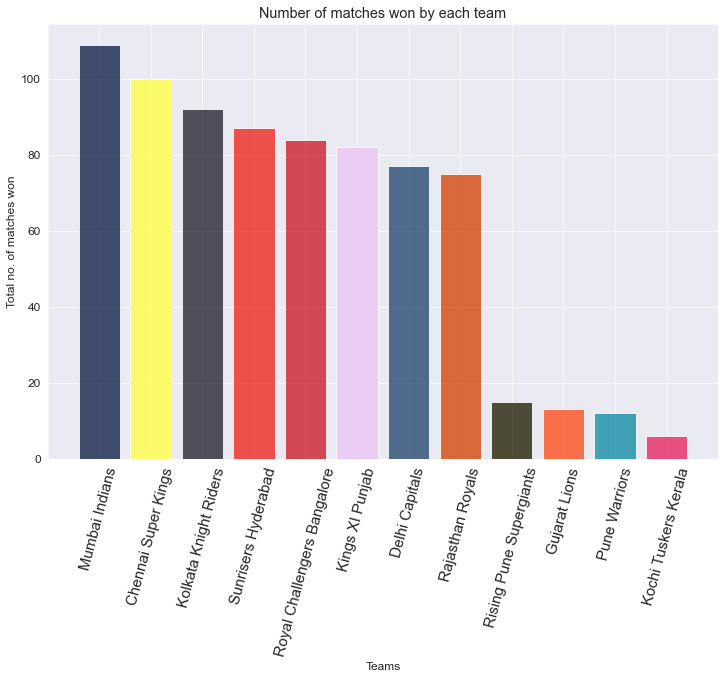

In [19]:
# Lets understand it clearly using a bar plot.

plt.title('Number of matches won by each team')
plt.xlabel('Teams')
plt.ylabel('Total no. of matches won')
plt.xticks(rotation=75,fontsize=15)
plt.bar(total_wins.team,total_wins.wins, color=['#15244C','#FFFF48','#292734','#EF2920','#CD202D','#ECC5F2',
               '#294A73','#D4480B','#242307','#FD511F','#158EA6','#E82865',
               '#005DB7','#C23E25','#E82878'], alpha=0.8)

It seems like Mumbai has won most number of matches. Lets analyse the reason and solve it!

In [20]:
#Total Number of matches played by each team
matches_by_team = pd.concat([ipl_df['team1'],ipl_df['team2']])
matches_by_team_df=matches_by_team.value_counts().reset_index()  

#value_counts() return a Series containing counts of unique values.
#Series.reset_index() function generate a new DataFrame or Series with the index reset

matches_by_team_df.columns=['team','total_matches']   
matches_by_team_df.set_index('team',inplace=True)    
merged_df=matches_by_team_df.merge(total_wins,on='team')

merged_df

,team,total_matches,wins
0,Mumbai Indians,187,109
1,Sunrisers Hyderabad,183,87
2,Royal Challengers Bangalore,180,84
3,Kolkata Knight Riders,178,92
4,Delhi Capitals,177,77
5,Kings XI Punjab,176,82
6,Chennai Super Kings,164,100
7,Rajasthan Royals,147,75
8,Pune Warriors,46,12
9,Rising Pune Supergiants,30,15


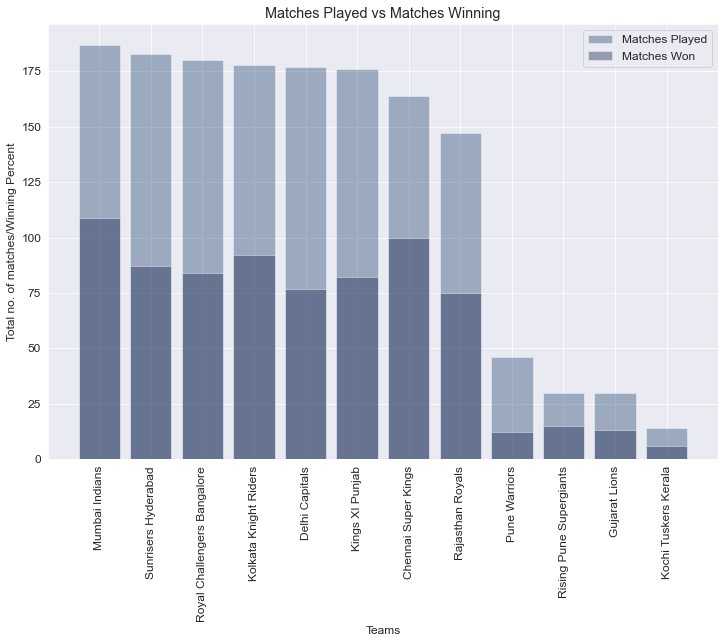

In [21]:
plt.title('Matches Played vs Matches Winning')
plt.xlabel('Teams')
plt.ylabel('Total no. of matches/Winning Percent')
plt.xticks(rotation=90)
plt.bar(merged_df.team,merged_df.total_matches,color = ['#294A73'],alpha=0.4)
plt.bar(merged_df.team,merged_df.wins, color = ['#15244C'], alpha=0.4)

plt.legend(['Matches Played','Matches Won']);

Mumbai have played most number of matches thats why it has highest number of wins. This is the reason behind mumbai being first in total wins category.

In [22]:
# Q5 Now lets find number of hostings by the city.


total_hostings = ipl_df.groupby('city')[['id']].count()

total_hostings = total_hostings.sort_values('id', ascending = False).reset_index()

total_hostings.rename(columns = {'id' : 'Games_Played' , 'city' : 'City'}, inplace = True)

total_hostings

,City,Games_Played
0,Mumbai,101
1,Bangalore,80
2,Kolkata,77
3,Delhi,74
4,Hyderabad,64
5,Chennai,57
6,Jaipur,47
7,Chandigarh,46
8,Pune,38
9,Durban,15


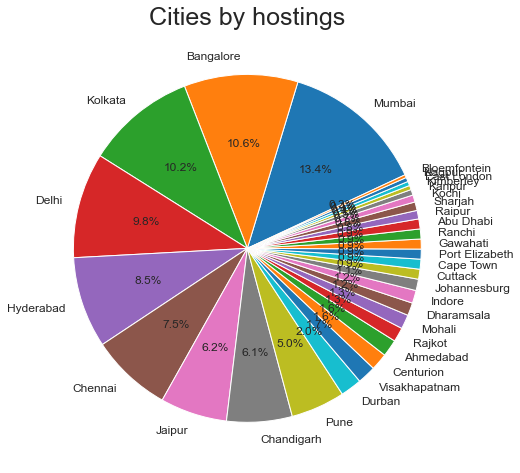

In [23]:
# Lets plot it using pie chart

labels = total_hostings.City

plt.title( 'Cities by hostings', fontsize = 25)

plt.pie(total_hostings['Games_Played'], labels= labels,  startangle=25, autopct='%.1f%%')




plt.show()

It seems the pie plot is hectic. So, I am converting all the lower contributers to "OTHERS" category.

In [24]:
less_hostings = total_hostings[total_hostings.Games_Played < 20]

sum_no = less_hostings.Games_Played.sum()

sum_no

172

In [25]:
new_row = {'City' : 'Others' , 'Games_Played' : 172}

In [26]:
less_hostings = less_hostings.append(new_row, ignore_index=True)

less_hostings

,City,Games_Played
0,Durban,15
1,Visakhapatnam,13
2,Centurion,12
3,Ahmedabad,12
4,Rajkot,10
5,Mohali,10
6,Dharamsala,9
7,Indore,9
8,Johannesburg,8
9,Cuttack,7


In [27]:
# adding this others to high hosting cities(every city barring less hosting cities.)

more_hostings = total_hostings[total_hostings.Games_Played > 20]

new_row = {'City' : 'Others' , 'Games_Played' : 172}

more_hostings = more_hostings.append(new_row, ignore_index=True)

more_hostings

,City,Games_Played
0,Mumbai,101
1,Bangalore,80
2,Kolkata,77
3,Delhi,74
4,Hyderabad,64
5,Chennai,57
6,Jaipur,47
7,Chandigarh,46
8,Pune,38
9,Others,172


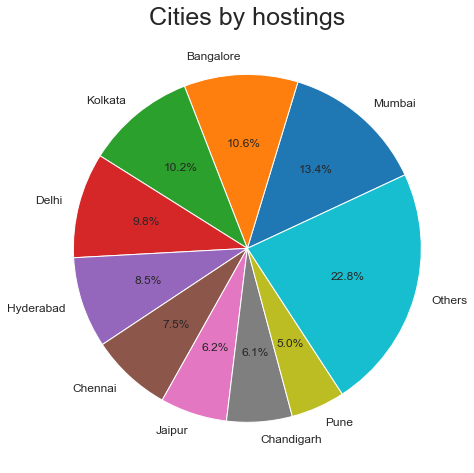

In [28]:
labels = more_hostings.City

plt.title( 'Cities by hostings', fontsize = 25)

plt.pie(more_hostings['Games_Played'], labels= labels,  startangle=25, autopct='%.1f%%')




plt.show()

In [29]:
# Q7 Lets find number of umpires served ad third umpire

third_umpire = ipl_df.groupby('umpire3')[['id']].count()

third_umpire = third_umpire.sort_values('id', ascending = False).reset_index()

third_umpire.rename(columns = {'id' : 'No_of_times', 'umpire3' : 'umpire'}, inplace = True)

third_umpire

,umpire,No_of_times
0,C Shamshuddin,10
1,O Nandan,10
2,Nitin Menon,10
3,Anil Chaudhary,9
4,Vineet Kulkarni,8
5,S Ravi,8
6,Yeshwant Barde,7
7,Anil Dandekar,7
8,Bruce Oxenford,7
9,Chris Gaffaney,6


In [30]:
# Converting persons with minimum third umpiring into OTHERS.

less_tv_umpiring = third_umpire[third_umpire.No_of_times < 4]

sum_number = less_tv_umpiring.No_of_times.sum()

sum_number

23

In [31]:
# Appending OTHER column to the data set named more_tv_umpiring

more_tv_umpiring = third_umpire[third_umpire.No_of_times > 4]

new_row = {'umpire' : 'Others' , 'No_of_times' : 23}

more_tv_umpiring = more_tv_umpiring.append(new_row, ignore_index=True)

more_tv_umpiring

,umpire,No_of_times
0,C Shamshuddin,10
1,O Nandan,10
2,Nitin Menon,10
3,Anil Chaudhary,9
4,Vineet Kulkarni,8
5,S Ravi,8
6,Yeshwant Barde,7
7,Anil Dandekar,7
8,Bruce Oxenford,7
9,Chris Gaffaney,6


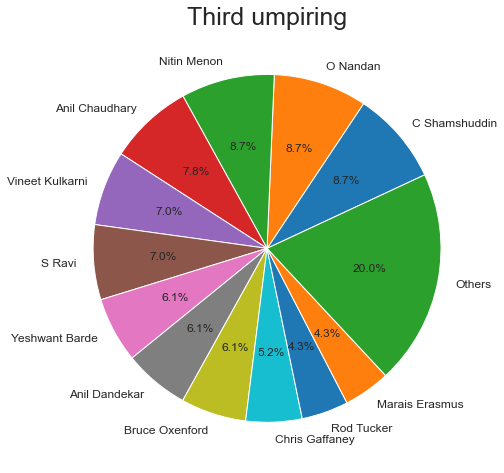

In [33]:
# Lets plot it

labels = more_tv_umpiring.umpire

plt.title( 'Third umpiring', fontsize = 25)

plt.pie(more_tv_umpiring['No_of_times'], labels= labels,  startangle=25, autopct='%.1f%%')




plt.show()

It seems like Shamsuddin, Nandan and Nithin Menon have served as tv empires most number of times.

Now the plot is looking nice and can be understood easily.

# Part-3 Asking intriguing questions

####  1) Teams with highest number of NR/Tie matches.
####  2) Team with highest wins both in chasing and defending.
####  3) Matches hosted by stadiums.
####  4) Teams which have won most number of finals, which teams have played finals.
####  5) Cases where toss winner is match winner.
####  6) Matches where team has chased succesfully.


In [34]:
no_result_df = ipl_df[ipl_df.result !='normal']
no_result_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
33,34,2017,Rajkot,29-04-2017,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,tie,0,Mumbai Indians,0,0,KH Pandya,Saurashtra Cricket Association Stadium,AK Chaudhary,CB Gaffaney,NaN
125,126,2009,Cape Town,23-04-2009,Rajasthan Royals,Kolkata Knight Riders,Kolkata Knight Riders,field,tie,0,Rajasthan Royals,0,0,YK Pathan,Newlands,MR Benson,M Erasmus,NaN
189,190,2010,Chennai,21-03-2010,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,tie,0,Kings XI Punjab,0,0,J Theron,"MA Chidambaram Stadium, Chepauk",K Hariharan,DJ Harper,NaN
300,301,2011,Delhi,21-05-2011,Delhi Capitals,Pune Warriors,Delhi Capitals,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
387,388,2013,Hyderabad,07-04-2013,Royal Challengers Bangalore,Sunrisers Hyderabad,Royal Challengers Bangalore,bat,tie,0,Sunrisers Hyderabad,0,0,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",AK Chaudhary,S Ravi,NaN
400,401,2013,Bangalore,16-04-2013,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,tie,0,Royal Challengers Bangalore,0,0,V Kohli,M Chinnaswamy Stadium,M Erasmus,VA Kulkarni,NaN
475,476,2014,Abu Dhabi,29-04-2014,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,bat,tie,0,Rajasthan Royals,0,0,JP Faulkner,Sheikh Zayed Stadium,Aleem Dar,AK Chaudhary,NaN
535,536,2015,Ahmedabad,21-04-2015,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,tie,0,Kings XI Punjab,0,0,SE Marsh,"Sardar Patel Stadium, Motera",M Erasmus,S Ravi,NaN
545,546,2015,Bangalore,29-04-2015,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,17-05-2015,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN


###  Question-1

In [35]:


team1_df = no_result_df.groupby('team1')[['id']].count()
team1_df=team1_df.sort_values('id', ascending=False).reset_index()
team1_df.rename(columns = {'id' : 'ties_NR_team1', 'team1' : 'team'}, inplace = True)

team1_df




,team,ties_NR_team1
0,Delhi Capitals,3
1,Rajasthan Royals,3
2,Royal Challengers Bangalore,3
3,Gujarat Lions,1
4,Kings XI Punjab,1
5,Kolkata Knight Riders,1
6,Mumbai Indians,1


In [36]:
team2_df = no_result_df.groupby('team2')[['id']].count()
team2_df=team2_df.sort_values('id', ascending=False).reset_index()
team2_df.rename(columns = {'id' : 'ties_NR_team2', 'team2' : 'team'}, inplace = True)

team2_df

,team,ties_NR_team2
0,Kolkata Knight Riders,2
1,Rajasthan Royals,2
2,Royal Challengers Bangalore,2
3,Sunrisers Hyderabad,2
4,Chennai Super Kings,1
5,Delhi Capitals,1
6,Kings XI Punjab,1
7,Mumbai Indians,1
8,Pune Warriors,1


In [37]:
# Merging two tables

max_tie_NR_df = team1_df.merge(team2_df, on = 'team')

max_tie_NR_df

,team,ties_NR_team1,ties_NR_team2
0,Delhi Capitals,3,1
1,Rajasthan Royals,3,2
2,Royal Challengers Bangalore,3,2
3,Kings XI Punjab,1,1
4,Kolkata Knight Riders,1,2
5,Mumbai Indians,1,1


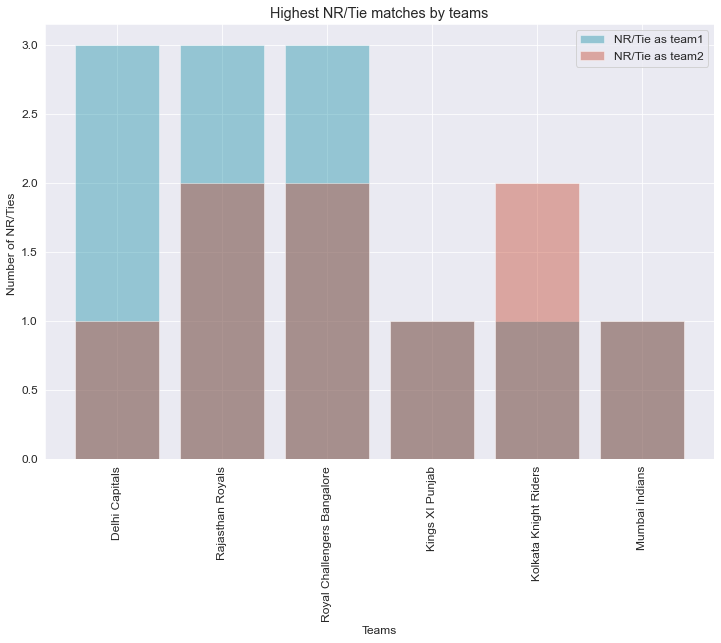

In [38]:
# Lets plot it.

plt.title('Highest NR/Tie matches by teams')
plt.xlabel('Teams')
plt.ylabel('Number of NR/Ties ')
plt.xticks(rotation=90)
plt.bar(max_tie_NR_df.team,max_tie_NR_df.ties_NR_team1,color = ['#158EA6'],alpha=0.4)
plt.bar(max_tie_NR_df.team,max_tie_NR_df.ties_NR_team2, color = ['#C23E25'], alpha=0.4)

plt.legend(['NR/Tie as team1','NR/Tie as team2']);

It seems like RCB and RR are part of highest munber of Noresult matches and ties.


### Question-2


In [39]:
# Finding huge defencds by considering 50 as the limit.

max_def_by_runs = ipl_df[ipl_df.win_by_runs > 50]

huge_vict_runs_df = max_def_by_runs.groupby('winner')[['id']].count()

huge_vict_runs_df = huge_vict_runs_df.sort_values('id', ascending= False).reset_index()

huge_vict_runs_df.rename(columns = {'id' : 'Number_of_huge_defends', 'winner' : 'Team'}, inplace = True)

huge_vict_runs_df

,Team,Number_of_huge_defends
0,Chennai Super Kings,13
1,Mumbai Indians,10
2,Royal Challengers Bangalore,7
3,Rajasthan Royals,6
4,Sunrisers Hyderabad,5
5,Delhi Capitals,4
6,Kings XI Punjab,4
7,Kolkata Knight Riders,3
8,Rising Pune Supergiants,1


In [40]:
# Finding huge chases by considering 8 wicket winning as a limit.

max_def_by_wkts = ipl_df[ipl_df.win_by_wickets > 8]

huge_vict_wkts_df = max_def_by_wkts.groupby('winner')[['id']].count()

huge_vict_wkts_df = huge_vict_wkts_df.sort_values('id', ascending= False).reset_index()

huge_vict_wkts_df.rename(columns = {'id' : 'Number_of_huge_chases', 'winner' : 'Team'}, inplace = True)

huge_vict_wkts_df

,Team,Number_of_huge_chases
0,Royal Challengers Bangalore,11
1,Delhi Capitals,7
2,Mumbai Indians,6
3,Sunrisers Hyderabad,6
4,Chennai Super Kings,5
5,Kolkata Knight Riders,5
6,Kings XI Punjab,3
7,Rajasthan Royals,3
8,Rising Pune Supergiants,2


In [41]:
all_round_team_df = huge_vict_runs_df.merge(huge_vict_wkts_df, on= 'Team')

all_round_team_df 

,Team,Number_of_huge_defends,Number_of_huge_chases
0,Chennai Super Kings,13,5
1,Mumbai Indians,10,6
2,Royal Challengers Bangalore,7,11
3,Rajasthan Royals,6,3
4,Sunrisers Hyderabad,5,6
5,Delhi Capitals,4,7
6,Kings XI Punjab,4,3
7,Kolkata Knight Riders,3,5
8,Rising Pune Supergiants,1,2


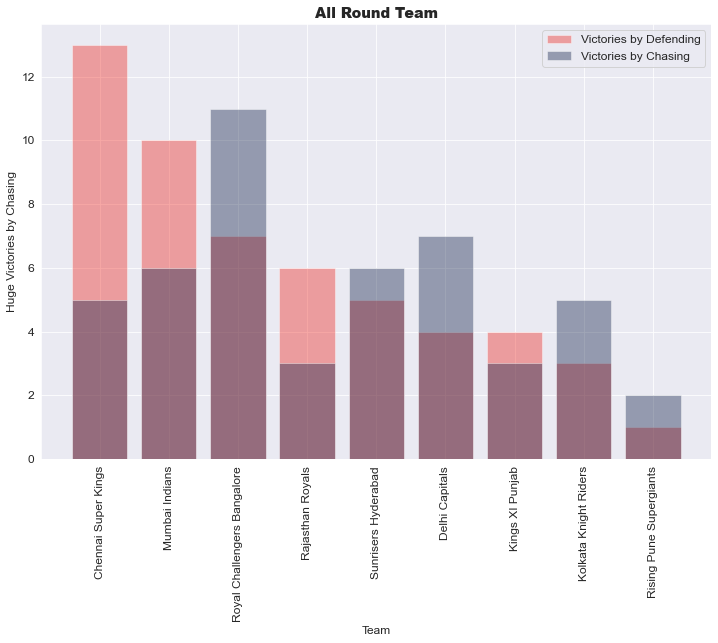

In [42]:
plt.title('All Round Team',fontweight=800)
plt.xlabel('Team')
plt.ylabel('Huge Victories by Chasing')
plt.xticks(rotation=90)

plt.bar(huge_vict_runs_df.Team,huge_vict_runs_df.Number_of_huge_defends,color=['#EF2920'], alpha=0.4)

plt.bar(huge_vict_wkts_df.Team,huge_vict_wkts_df.Number_of_huge_chases,color=['#15244C'], alpha=0.4)


plt.legend(['Victories by Defending', 'Victories by Chasing']);

It seems like RCB has most number of succesful chases while CSK has most number of defends.

### Question-3

In [43]:
# Finding matches by stadium

venue_df = ipl_df.groupby('venue')[['id']].count()

venue_df = venue_df.sort_values('id', ascending= False).reset_index()

venue_df.rename(columns = {'id' : 'matches', 'venue' : 'stadium'}, inplace = True)

venue_df
           

,stadium,matches
0,Eden Gardens,77
1,Wankhede Stadium,73
2,M Chinnaswamy Stadium,73
3,Feroz Shah Kotla,67
4,"Rajiv Gandhi International Stadium, Uppal",56
5,"MA Chidambaram Stadium, Chepauk",49
6,Sawai Mansingh Stadium,47
7,"Punjab Cricket Association Stadium, Mohali",35
8,Maharashtra Cricket Association Stadium,21
9,Dr DY Patil Sports Academy,17


In [44]:
less_hostings_stadium = venue_df[venue_df.matches< 15]

sum_num = less_hostings_stadium.matches.sum()

sum_num

209

In [45]:
# Adding OTHERS row to the venue_df.

newrow = {'stadium' : 'Others' , 'matches' : 209}

more_hostings_stadium = venue_df[venue_df.matches > 15]

more_hostings_stadium = more_hostings_stadium.append(newrow, ignore_index=True)

more_hostings_stadium

,stadium,matches
0,Eden Gardens,77
1,Wankhede Stadium,73
2,M Chinnaswamy Stadium,73
3,Feroz Shah Kotla,67
4,"Rajiv Gandhi International Stadium, Uppal",56
5,"MA Chidambaram Stadium, Chepauk",49
6,Sawai Mansingh Stadium,47
7,"Punjab Cricket Association Stadium, Mohali",35
8,Maharashtra Cricket Association Stadium,21
9,Dr DY Patil Sports Academy,17


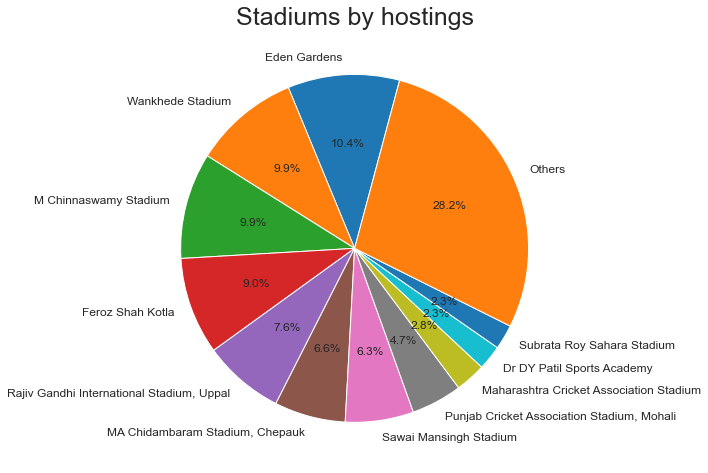

In [46]:
# Lets plot

labels = more_hostings_stadium.stadium

plt.title( 'Stadiums by hostings', fontsize = 25)

plt.pie(more_hostings_stadium['matches'], labels= labels,  startangle=75, autopct='%.1f%%')



plt.show()

Eden Gardens, Wankhade and Chinnaswamy are top three hosting stadium. This is obvious because the respective teams are among highest matches played teams.

### Question-4


In [47]:
final_match_df = ipl_df.groupby('season').tail(1).sort_values('season').reset_index()
final_match_df

,index,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,116,117,2008,Mumbai,01-06-2008,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,Dr DY Patil Sports Academy,BF Bowden,RE Koertzen,NaN
1,173,174,2009,Johannesburg,24-05-2009,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,6,0,A Kumble,New Wanderers Stadium,RE Koertzen,SJA Taufel,NaN
2,233,234,2010,Mumbai,25-04-2010,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,22,0,SK Raina,Dr DY Patil Sports Academy,RE Koertzen,SJA Taufel,NaN
3,306,307,2011,Chennai,28-05-2011,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,58,0,M Vijay,"MA Chidambaram Stadium, Chepauk",Asad Rauf,SJA Taufel,NaN
4,380,381,2012,Chennai,27-05-2012,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,0,Kolkata Knight Riders,0,5,MS Bisla,"MA Chidambaram Stadium, Chepauk",BF Bowden,SJA Taufel,NaN
5,456,457,2013,Kolkata,26-05-2013,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,23,0,KA Pollard,Eden Gardens,HDPK Dharmasena,SJA Taufel,NaN
6,516,517,2014,Bangalore,01-06-2014,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,3,MK Pandey,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN
7,575,576,2015,Kolkata,24-05-2015,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,41,0,RG Sharma,Eden Gardens,HDPK Dharmasena,RK Illingworth,NaN
8,635,636,2016,Bangalore,29-05-2016,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN
9,58,59,2017,Hyderabad,21-05-2017,Mumbai Indians,Rising Pune Supergiants,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,KH Pandya,"Rajiv Gandhi International Stadium, Uppal",NJ Llong,S Ravi,NaN


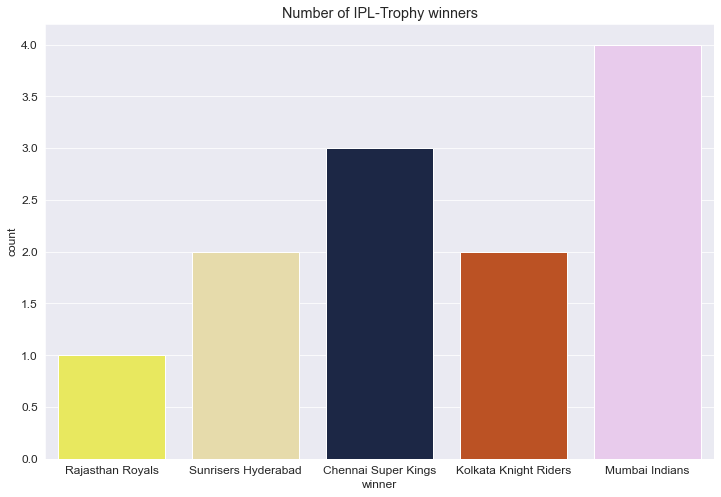

In [48]:
final_match_df['winner'].value_counts()

plt.title('Number of IPL-Trophy winners')
sns.countplot(x=final_match_df['winner'],palette=['#FFFF48','#F0E1A1','#15244C','#D4480B','#ECC5F2','#1C2C46']);

In [49]:
final_team = pd.concat([final_match_df['team1'],final_match_df['team2']])

final_team.value_counts()

Chennai Super Kings            8
Mumbai Indians                 5
Royal Challengers Bangalore    3
Sunrisers Hyderabad            3
Kolkata Knight Riders          2
Rising Pune Supergiants        1
Rajasthan Royals               1
Kings XI Punjab                1
dtype: int64

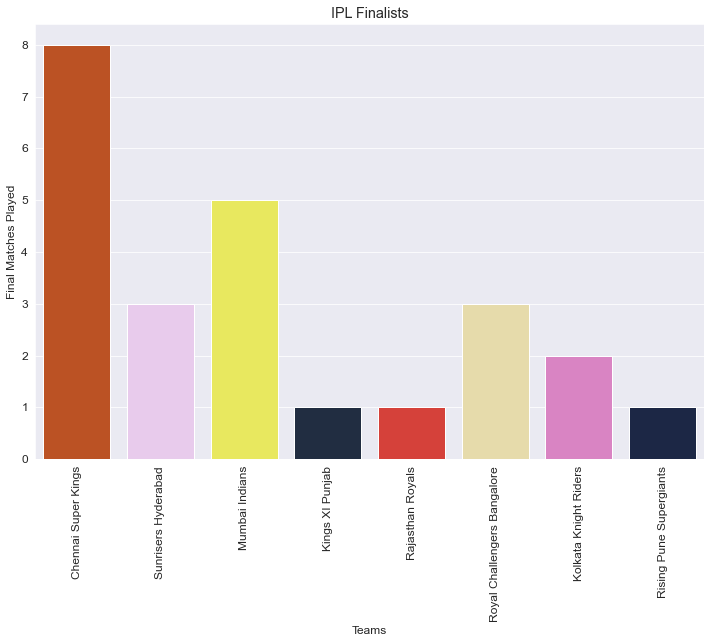

In [50]:
# Lets Plot

plt.title('IPL Finalists')
plt.xlabel('Teams')
sns.countplot(x=final_team,palette=['#D4480B','#ECC5F2','#FFFF48','#1C2C46','#EF2920','#F0E1A1','#E776CA','#15244C','#CD202D'])
plt.ylabel('Final Matches Played')
plt.xticks(rotation=90);

CSK has played most number of finals but MI has won most number of trophies.

### Question-5

In [51]:
match_and_toss_winner_df = ipl_df[ipl_df['toss_winner']==ipl_df['winner']]

match_and_toss_winner_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08-04-2017,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,2017,Hyderabad,09-04-2017,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,11346,2019,Mohali,05-05-2019,Chennai Super Kings,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,KL Rahul,IS Bindra Stadium,KN Ananthapadmanabhan,C Shamshuddin,Bruce Oxenford
751,11347,2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
753,11413,2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [52]:
max_toss_wins_df = match_and_toss_winner_df.groupby('winner')[['id']].count()

max_toss_wins_df = max_toss_wins_df.sort_values('id', ascending= False).reset_index()

max_toss_wins_df.rename(columns = {'id' : 'Number_of_match_winnings_after_toss_win', 'winner' : 'Team'}, inplace = True)

max_toss_wins_df

,Team,Number_of_match_winnings_after_toss_win
0,Chennai Super Kings,57
1,Mumbai Indians,56
2,Kolkata Knight Riders,53
3,Delhi Capitals,42
4,Rajasthan Royals,42
5,Sunrisers Hyderabad,42
6,Royal Challengers Bangalore,41
7,Kings XI Punjab,35
8,Gujarat Lions,10
9,Rising Pune Supergiants,8


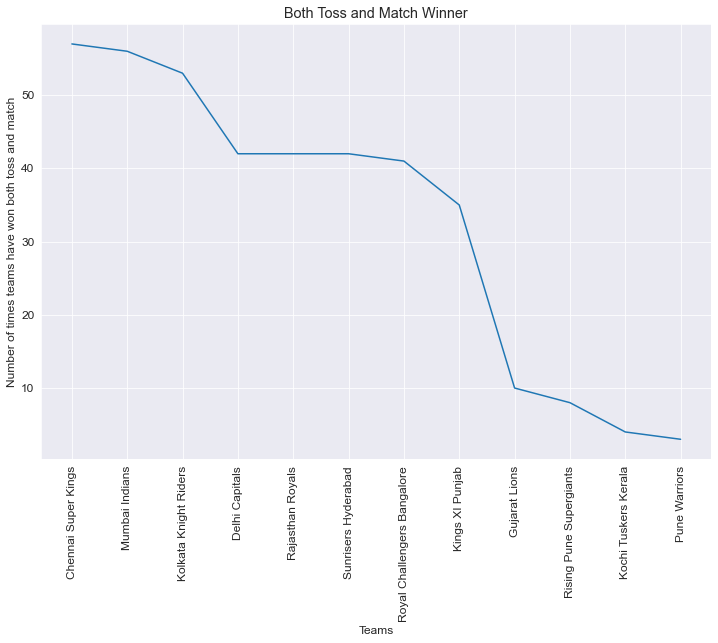

In [53]:
plt.title('Both Toss and Match Winner')
plt.xlabel('Teams')
plt.ylabel('Number of times teams have won both toss and match')
plt.xticks(rotation=90)

plt.plot(max_toss_wins_df.Team,max_toss_wins_df.Number_of_match_winnings_after_toss_win)


It seems like CSK is the team which has won both toss and match most number of times.

#### NOTE: I have used line plot because I have not used it till now, generally bar plot would preferred for this.

### Question-6

In [54]:
toss_winner_decision_df = match_and_toss_winner_df['toss_decision'].value_counts() 

toss_loser_match_winner_df = ipl_df[ipl_df['toss_winner']!=ipl_df['winner']] 

toss_loser_match_winner_df = toss_loser_match_winner_df[toss_loser_match_winner_df.result != 'tie'] 

toss_decision_loser_df = toss_loser_match_winner_df['toss_decision'].value_counts() 

team_chase_won =toss_decision_loser_df.bat+toss_winner_decision_df.field

print('Total number of matches where team chasing is the winner of the match is {}'.format(team_chase_won))

Total number of matches where team chasing is the winner of the match is 416


IPL has been a tournament where teams chasing have outplayed by team batting first.

#  Part-4 Inferences and Results.


## The summary and bullet points of the whole analysis:

###  1. Chris Gayle is the player with highest number of Player of the Match awards.
###  2. 2011, 2012, 2013 seasons have most number of matches played because of more number of teams.
###  3. Mumbai Indians have wons most number of matches followed by Chennai Super Kings.
###  4. Most number of matches are played by MI followed by SRH and RCB.
###  5. Among cities Mumbai, Bangalore and Kolkata have hosted more number of matches.
###  6. Shamsuddin, Nitin Menon and Nandan have served as TV umpires most number os times.

###  7.RR and RCB are having highest NR/Tie games, while RCB has chases most number of times and CSK has defended most number of times.
###  8. MI has played won most finals but CSK has played most finals.
###  9. CSK has won both toss and math most number of times.


# Part-5  Future work

I will work on similar data sets and try developing my skills and usage of tools properly.
For this IPL data set  I will try adding new colums such as score card and try finding another dats set similar to this and perform analysis on that. 

# Thank You
